In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [6]:
df = pd.read_csv('Raw_Data.xls')
df

1. Age 2. Gender                             3. University  \
0     18-22    Female  Independent University, Bangladesh (IUB)   
1     18-22      Male  Independent University, Bangladesh (IUB)   
2     18-22      Male  Independent University, Bangladesh (IUB)   
3     18-22      Male  Independent University, Bangladesh (IUB)   
4     18-22      Male  Independent University, Bangladesh (IUB)   
...     ...       ...                                       ...   
1972  23-26      Male  Bangladesh Agricultural University (BAU)   
1973  23-26    Female  Bangladesh Agricultural University (BAU)   
1974  23-26    Female  Bangladesh Agricultural University (BAU)   
1975  23-26      Male  Bangladesh Agricultural University (BAU)   
1976  23-26      Male  Independent University, Bangladesh (IUB)   

                                     4. Department           5. Academic Year  \
0     Engineering - CS / CSE / CSC / Similar to CS  Fourth Year or Equivalent   
1     Engineering - CS / CSE / CSC / Similar to CS   First Year or Equivalent   
2     Engineering - CS / CSE / CSC / Similar to CS   First Year or Equivalent   
3     Engineering - CS / CSE / CSC / Similar to CS   First Year or Equivalent   
4     Engineering - CS / CSE / CSC / Similar to CS   First Year or Equivalent   
...                                            ...                        ...   
1972                           Biological Sciences  Fourth Year or Equivalent   
1973                                         Other  Fourth Year or Equivalent   
1974                           Biological Sciences                      Other   
1975                                         Other  Fourth Year or Equivalent   
1976  Engineering - CS / CSE / CSC / Similar to CS   Third Year or Equivalent   

     6. Current CGPA  \
0        2.50 - 2.99   
1        3.80 - 4.00   
2        3.00 - 3.39   
3        3.40 - 3.79   
4        3.40 - 3.79   
...              ...   
1972     3.40 - 3.79   
1973     3.40 - 3.79   
1974     3.80 - 4.00   
1975     3.00 - 3.39   
1976     2.50 - 2.99   

     7. Did you receive a waiver or scholarship at your university?  \
0                                                    No               
1                                                    No               
2                                                    No               
3                                                    No               
4                                                    No               
...                                                 ...               
1972                                                 No               
1973                                                 No               
1974                                                 No               
1975                                                 No               
1976                                                 No               

      1. In a semester, how often you felt nervous, anxious or on edge due to academic pressure?   \
0                                                     1                                             
1                                                     2                                             
2                                                     2                                             
3                                                     2                                             
4                                                     1                                             
...                                                 ...                                             
1972                                                  1                                             
1973                                                  2                                             
1974                                                  1                                             
1975                                                  1                    

In [7]:
df = df.dropna()
df

1. Age 2. Gender                             3. University  \
0     18-22    Female  Independent University, Bangladesh (IUB)   
1     18-22      Male  Independent University, Bangladesh (IUB)   
2     18-22      Male  Independent University, Bangladesh (IUB)   
3     18-22      Male  Independent University, Bangladesh (IUB)   
4     18-22      Male  Independent University, Bangladesh (IUB)   
...     ...       ...                                       ...   
1972  23-26      Male  Bangladesh Agricultural University (BAU)   
1973  23-26    Female  Bangladesh Agricultural University (BAU)   
1974  23-26    Female  Bangladesh Agricultural University (BAU)   
1975  23-26      Male  Bangladesh Agricultural University (BAU)   
1976  23-26      Male  Independent University, Bangladesh (IUB)   

                                     4. Department           5. Academic Year  \
0     Engineering - CS / CSE / CSC / Similar to CS  Fourth Year or Equivalent   
1     Engineering - CS / CSE / CSC / Similar to CS   First Year or Equivalent   
2     Engineering - CS / CSE / CSC / Similar to CS   First Year or Equivalent   
3     Engineering - CS / CSE / CSC / Similar to CS   First Year or Equivalent   
4     Engineering - CS / CSE / CSC / Similar to CS   First Year or Equivalent   
...                                            ...                        ...   
1972                           Biological Sciences  Fourth Year or Equivalent   
1973                                         Other  Fourth Year or Equivalent   
1974                           Biological Sciences                      Other   
1975                                         Other  Fourth Year or Equivalent   
1976  Engineering - CS / CSE / CSC / Similar to CS   Third Year or Equivalent   

     6. Current CGPA  \
0        2.50 - 2.99   
1        3.80 - 4.00   
2        3.00 - 3.39   
3        3.40 - 3.79   
4        3.40 - 3.79   
...              ...   
1972     3.40 - 3.79   
1973     3.40 - 3.79   
1974     3.80 - 4.00   
1975     3.00 - 3.39   
1976     2.50 - 2.99   

     7. Did you receive a waiver or scholarship at your university?  \
0                                                    No               
1                                                    No               
2                                                    No               
3                                                    No               
4                                                    No               
...                                                 ...               
1972                                                 No               
1973                                                 No               
1974                                                 No               
1975                                                 No               
1976                                                 No               

      1. In a semester, how often you felt nervous, anxious or on edge due to academic pressure?   \
0                                                     1                                             
1                                                     2                                             
2                                                     2                                             
3                                                     2                                             
4                                                     1                                             
...                                                 ...                                             
1972                                                  1                                             
1973                                                  2                                             
1974                                                  1                                             
1975                                                  1                    

In [8]:
df = pd.get_dummies(df, columns=['2. Gender', '3. University', '4. Department']) 		

In [9]:
print(df['6. Current CGPA'].head())
print(df['6. Current CGPA'].unique())


0    2.50 - 2.99
1    3.80 - 4.00
2    3.00 - 3.39
3    3.40 - 3.79
4    3.40 - 3.79
Name: 6. Current CGPA, dtype: object
['2.50 - 2.99' '3.80 - 4.00' '3.00 - 3.39' '3.40 - 3.79' 'Below 2.50'
 'Other']


In [10]:
# You can replace 'Below 18' with the median age of the dataset or any reasonable default
def convert_age(age):
    if 'Below 18' in age:
        return 17  # Or replace with the median age if available
    elif '-' in age:
        age_range = age.split('-')
        return (int(age_range[0]) + int(age_range[1])) / 2
    else:
        try:
            return float(age)
        except ValueError:
            return None  # Invalid entries will be handled later


In [11]:
print(df['6. Current CGPA'].head())
print(df['6. Current CGPA'].unique())

0    2.50 - 2.99
1    3.80 - 4.00
2    3.00 - 3.39
3    3.40 - 3.79
4    3.40 - 3.79
Name: 6. Current CGPA, dtype: object
['2.50 - 2.99' '3.80 - 4.00' '3.00 - 3.39' '3.40 - 3.79' 'Below 2.50'
 'Other']


In [12]:
def convert_cgpa(cgpa):
    if isinstance(cgpa, str):
        # Handle ranges like '2.50 - 2.99'
        if '-' in cgpa:
            cgpa_range = cgpa.split('-')
            try:
                start = float(cgpa_range[0].strip())
                end = float(cgpa_range[1].strip())
                midpoint = (start + end) / 2
                return midpoint
            except ValueError:
                return None
        # Handle exact CGPA values
        else:
            try:
                return float(cgpa.strip())
            except ValueError:
                return None
    elif isinstance(cgpa, (int, float)):
        return float(cgpa)  # Ensure numeric values are converted to float
    else:
        return None  # Handle any unexpected types

# Apply the conversion function to the '6. Current CGPA' column
df['6. Current CGPA'] = df['6. Current CGPA'].apply(convert_cgpa)

# Check the conversion to ensure all CGPA values are now numeric
print(df['6. Current CGPA'].head())


0    2.745
1    3.900
2    3.195
3    3.595
4    3.595
Name: 6. Current CGPA, dtype: float64


In [13]:
# Define a function to handle different age cases
def convert_age(age):
    if isinstance(age, str):
        if 'Below 18' in age:
            return 17
        elif '-' in age:
            age_range = age.split('-')
            return (int(age_range[0].strip()) + int(age_range[1].strip())) 
        else:
            try:
                return float(age.strip())  
            except ValueError:
                return None  
    elif isinstance(age, (int, float)):
        return float(age)
    else:
        return None  

# Apply the conversion function to the '1. Age' column
df['1. Age'] = df['1. Age'].apply(convert_age)

# Check the conversion to ensure all ages are now numeric
print(df['1. Age'].head())
print(df['1. Age'].dtype)


0    40.0
1    40.0
2    40.0
3    40.0
4    40.0
Name: 1. Age, dtype: float64
float64


In [14]:
df


1. Age           5. Academic Year  6. Current CGPA  \
0       40.0  Fourth Year or Equivalent            2.745   
1       40.0   First Year or Equivalent            3.900   
2       40.0   First Year or Equivalent            3.195   
3       40.0   First Year or Equivalent            3.595   
4       40.0   First Year or Equivalent            3.595   
...      ...                        ...              ...   
1972    49.0  Fourth Year or Equivalent            3.595   
1973    49.0  Fourth Year or Equivalent            3.595   
1974    49.0                      Other            3.900   
1975    49.0  Fourth Year or Equivalent            3.195   
1976    49.0   Third Year or Equivalent            2.745   

     7. Did you receive a waiver or scholarship at your university?  \
0                                                    No               
1                                                    No               
2                                                    No               
3                                                    No               
4                                                    No               
...                                                 ...               
1972                                                 No               
1973                                                 No               
1974                                                 No               
1975                                                 No               
1976                                                 No               

      1. In a semester, how often you felt nervous, anxious or on edge due to academic pressure?   \
0                                                     1                                             
1                                                     2                                             
2                                                     2                                             
3                                                     2                                             
4                                                     1                                             
...                                                 ...                                             
1972                                                  1                                             
1973                                                  2                                             
1974                                                  1                                             
1975                                                  1                                             
1976                                                  1                                             

      2. In a semester, how often have you been unable to stop worrying about your academic affairs?   \
0                                                     1                                                 
1                                                     2                                                 
2                                                     1                                                 
3                                                     1                                                 
4                                                     1                                                 
...                                                 ...                                                 
1972                                                  2                                                 
1973                                                  2                                                 
1974                                                  0                                                 
1975                                                  1                                                 
1976                                                  1         

In [15]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df[['1. Age', '6. Current CGPA']])
print(scaled_features)

[[-0.69180998 -1.51467077]
 [-0.69180998  1.50992741]
 [-0.69180998 -0.3362559 ]
 ...
 [ 1.23674739  1.50992741]
 [ 1.23674739 -0.3362559 ]
 [ 1.23674739 -1.51467077]]


In [16]:
df[['1. Age', '6. Current CGPA']] = scaled_features

In [17]:
# Split the dataset into features and labels
X = df.drop(columns=['Anxiety Value', 'Anxiety Label', 'Stress Value', 'Stress Label', 'Depression Value', 'Depression Label'])
y_anxiety = df['Anxiety Label']
y_stress = df['Stress Label']
y_depression = df['Depression Label']

# Split into training and testing sets
X_train_anxiety, X_test_anxiety, y_train_anxiety, y_test_anxiety = train_test_split(X, y_anxiety, test_size=0.2, random_state=42)
X_train_stress, X_test_stress, y_train_stress, y_test_stress = train_test_split(X, y_stress, test_size=0.2, random_state=42)
X_train_depression, X_test_depression, y_train_depression, y_test_depression = train_test_split(X, y_depression, test_size=0.2, random_state=42)


In [18]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Split the dataset into features and labels
X = df.drop(columns=['Anxiety Value', 'Anxiety Label', 'Stress Value', 'Stress Label', 'Depression Value', 'Depression Label'])
y_anxiety = df['Anxiety Label']
y_stress = df['Stress Label']
y_depression = df['Depression Label']

categorical_columns = X.select_dtypes(include=['object']).columns

label_encoder = LabelEncoder()
for col in categorical_columns:
    X[col] = label_encoder.fit_transform(X[col])

X_train_anxiety, X_test_anxiety, y_train_anxiety, y_test_anxiety = train_test_split(X, y_anxiety, test_size=0.2, random_state=42)
X_train_stress, X_test_stress, y_train_stress, y_test_stress = train_test_split(X, y_stress, test_size=0.2, random_state=42)
X_train_depression, X_test_depression, y_train_depression, y_test_depression = train_test_split(X, y_depression, test_size=0.2, random_state=42)

anxiety_model = RandomForestClassifier(n_estimators=100, random_state=42)
anxiety_model.fit(X_train_anxiety, y_train_anxiety)
y_pred_anxiety = anxiety_model.predict(X_test_anxiety)

# Evaluate the model
print(classification_report(y_test_anxiety, y_pred_anxiety))
print('Accuracy:', accuracy_score(y_test_anxiety, y_pred_anxiety))


                  precision    recall  f1-score   support

    Mild Anxiety       0.88      0.88      0.88        99
 Minimal Anxiety       0.95      0.80      0.87        25
Moderate Anxiety       0.81      0.84      0.82       122
  Severe Anxiety       0.91      0.91      0.91       150

        accuracy                           0.87       396
       macro avg       0.89      0.86      0.87       396
    weighted avg       0.88      0.87      0.87       396

Accuracy: 0.8737373737373737


In [19]:
stress_model = RandomForestClassifier(n_estimators=100, random_state=42)
stress_model.fit(X_train_stress, y_train_stress)
y_pred_stress = stress_model.predict(X_test_stress)

print("Stress Prediction Model:")
print(classification_report(y_test_stress, y_pred_stress))
print("Accuracy:", accuracy_score(y_test_stress, y_pred_stress))

Stress Prediction Model:
                       precision    recall  f1-score   support

High Perceived Stress       0.92      0.90      0.91       104
           Low Stress       1.00      0.38      0.55        24
      Moderate Stress       0.91      0.97      0.94       268

             accuracy                           0.92       396
            macro avg       0.94      0.75      0.80       396
         weighted avg       0.92      0.92      0.91       396

Accuracy: 0.9166666666666666


In [20]:
depression_model = RandomForestClassifier(n_estimators=100, random_state=42)
depression_model.fit(X_train_depression, y_train_depression)
y_pred_depression = depression_model.predict(X_test_depression)

print("Depression Prediction Model:")
print(classification_report(y_test_depression, y_pred_depression))
print("Accuracy:", accuracy_score(y_test_depression, y_pred_depression))

Depression Prediction Model:
                              precision    recall  f1-score   support

             Mild Depression       0.79      0.86      0.82        71
          Minimal Depression       0.54      0.44      0.48        16
         Moderate Depression       0.82      0.80      0.81        95
Moderately Severe Depression       0.83      0.82      0.83       112
               No Depression       1.00      0.56      0.71         9
           Severe Depression       0.89      0.92      0.91        93

                    accuracy                           0.83       396
                   macro avg       0.81      0.73      0.76       396
                weighted avg       0.83      0.83      0.82       396

Accuracy: 0.8257575757575758


In [21]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.multioutput import MultiOutputClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Renaming columns
df.rename(columns={
    '1. In a semester, how often you felt nervous, anxious or on edge due to academic pressure? ': 'Q1',
    '2. In a semester, how often have you been unable to stop worrying about your academic affairs? ': 'Q2',
    '3. In a semester, how often have you had trouble relaxing due to academic pressure? ': 'Q3',
    '4. In a semester, how often have you been easily annoyed or irritated because of academic pressure?': 'Q4',
    '5. In a semester, how often have you worried too much about academic affairs? ': 'Q5',
    '6. In a semester, how often have you been so restless due to academic pressure that it is hard to sit still?': 'Q6',
    '7. In a semester, how often have you felt afraid, as if something awful might happen?': 'Q7',

    # r1 to r10 columns
    '1. In a semester, how often have you felt upset due to something that happened in your academic affairs? ': 'r1',
    '2. In a semester, how often you felt as if you were unable to control important things in your academic affairs?': 'r2',
    '3. In a semester, how often you felt nervous and stressed because of academic pressure? ': 'r3',
    '4. In a semester, how often you felt as if you could not cope with all the mandatory academic activities? (e.g, assignments, quiz, exams) ': 'r4',
    '5. In a semester, how often you felt confident about your ability to handle your academic / university problems?': 'r5',
    '6. In a semester, how often you felt as if things in your academic life is going on your way? ': 'r6',
    '7. In a semester, how often are you able to control irritations in your academic / university affairs? ': 'r7',
    '8. In a semester, how often you felt as if your academic performance was on top?': 'r8',
    '9. In a semester, how often you got angered due to bad performance or low grades that is beyond your control? ': 'r9',
    '10. In a semester, how often you felt as if academic difficulties are piling up so high that you could not overcome them? ': 'r10',

    # s1 to s9 columns
    '1. In a semester, how often have you had little interest or pleasure in doing things?': 's1',
    '2. In a semester, how often have you been feeling down, depressed or hopeless?': 's2',
    '3. In a semester, how often have you had trouble falling or staying asleep, or sleeping too much? ': 's3',
    '4. In a semester, how often have you been feeling tired or having little energy? ': 's4',
    '5. In a semester, how often have you had poor appetite or overeating? ': 's5',
    '6. In a semester, how often have you been feeling bad about yourself - or that you are a failure or have let yourself or your family down? ': 's6',
    '7. In a semester, how often have you been having trouble concentrating on things, such as reading the books or watching television? ': 's7',
    '8. In a semester, how often have you moved or spoke too slowly for other people to notice? Or you\'ve been moving a lot more than usual because you\'ve been restless? ': 's8',
    '9. In a semester, how often have you had thoughts that you would be better off dead, or of hurting yourself? ': 's9',

}, inplace=True)


# Select features and target labels
features = df[['Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6', 'Q7', 'r1', 'r2', 'r3', 'r4', 'r5', 'r6', 'r7', 'r8', 'r9', 'r10', 's1', 's2', 's3', 's4', 's5', 's6', 's7', 's8', 's9']]  # Add more features as needed
target = df[['Anxiety Label', 'Stress Label', 'Depression Label']]  

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Use a MultiOutputClassifier with RandomForest
model = MultiOutputClassifier(RandomForestClassifier())
model.fit(X_train_scaled, y_train)

# Make predictions
y_pred = model.predict(X_test_scaled)

# Evaluate the model
print("Accuracy for each label:")
print(f"Anxiety: {accuracy_score(y_test['Anxiety Label'], y_pred[:, 0])}")
print(f"Stress: {accuracy_score(y_test['Stress Label'], y_pred[:, 1])}")
print(f"Depression: {accuracy_score(y_test['Depression Label'], y_pred[:, 2])}")


Accuracy for each label:
Anxiety: 0.8964646464646465
Stress: 0.9090909090909091
Depression: 0.8333333333333334


In [22]:
from sklearn.metrics import classification_report

print("Anxiety Classification Report:")
print(classification_report(y_test['Anxiety Label'], y_pred[:, 0]))

print("Stress Classification Report:")
print(classification_report(y_test['Stress Label'], y_pred[:, 1]))

print("Depression Classification Report:")
print(classification_report(y_test['Depression Label'], y_pred[:, 2]))


Anxiety Classification Report:
                  precision    recall  f1-score   support

    Mild Anxiety       0.91      0.85      0.88        99
 Minimal Anxiety       1.00      0.84      0.91        25
Moderate Anxiety       0.83      0.88      0.85       122
  Severe Anxiety       0.93      0.95      0.94       150

        accuracy                           0.90       396
       macro avg       0.92      0.88      0.90       396
    weighted avg       0.90      0.90      0.90       396

Stress Classification Report:
                       precision    recall  f1-score   support

High Perceived Stress       0.90      0.90      0.90       104
           Low Stress       0.90      0.38      0.53        24
      Moderate Stress       0.91      0.96      0.93       268

             accuracy                           0.91       396
            macro avg       0.91      0.75      0.79       396
         weighted avg       0.91      0.91      0.90       396

Depression Classification Re

In [23]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.multioutput import MultiOutputClassifier
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.metrics import classification_report

features = df[['Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6', 'Q7', 'r1', 'r2', 'r3', 'r4', 'r5', 'r6', 'r7', 'r8', 'r9', 'r10', 's1', 's2', 's3', 's4', 's5', 's6', 's7', 's8', 's9']]  # Add more features as needed
target = df[['Anxiety Label', 'Stress Label', 'Depression Label']]  

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = MultiOutputClassifier(HistGradientBoostingClassifier())
model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)

print("Anxiety Classification Report:")
print(classification_report(y_test['Anxiety Label'], y_pred[:, 0]))

print("Stress Classification Report:")
print(classification_report(y_test['Stress Label'], y_pred[:, 1]))

print("Depression Classification Report:")
print(classification_report(y_test['Depression Label'], y_pred[:, 2]))


Anxiety Classification Report:
                  precision    recall  f1-score   support

    Mild Anxiety       0.90      0.90      0.90        99
 Minimal Anxiety       0.96      0.92      0.94        25
Moderate Anxiety       0.88      0.86      0.87       122
  Severe Anxiety       0.94      0.96      0.95       150

        accuracy                           0.91       396
       macro avg       0.92      0.91      0.91       396
    weighted avg       0.91      0.91      0.91       396

Stress Classification Report:
                       precision    recall  f1-score   support

High Perceived Stress       0.95      0.91      0.93       104
           Low Stress       1.00      0.71      0.83        24
      Moderate Stress       0.94      0.98      0.96       268

             accuracy                           0.95       396
            macro avg       0.96      0.87      0.91       396
         weighted avg       0.95      0.95      0.95       396

Depression Classification Re

In [24]:
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

model = HistGradientBoostingClassifier()

# Define the parameter grid
param_grid = {
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7],
    'min_samples_leaf': [1, 2, 4]
}

# Function to perform grid search and classification for each label
def perform_grid_search(X_train, y_train, X_test, y_test, label_name):
    print(f"--- Grid Search for {label_name} ---")

    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, scoring='accuracy')
    
    grid_search.fit(X_train, y_train)
    
    print(f"Best parameters found for {label_name}: {grid_search.best_params_}")
    
    best_model = grid_search.best_estimator_
    
    y_pred = best_model.predict(X_test)
    
    print(f"\nClassification Report for {label_name}:")
    print(classification_report(y_test, y_pred))
    print("\n")

# Perform grid search for Anxiety
perform_grid_search(X_train_scaled, y_train.iloc[:, 0], X_test_scaled, y_test.iloc[:, 0], 'Anxiety')

# Perform grid search for Stress
perform_grid_search(X_train_scaled, y_train.iloc[:, 1], X_test_scaled, y_test.iloc[:, 1], 'Stress')

# Perform grid search for Depression
perform_grid_search(X_train_scaled, y_train.iloc[:, 2], X_test_scaled, y_test.iloc[:, 2], 'Depression')


--- Grid Search for Anxiety ---
Best parameters found for Anxiety: {'learning_rate': 0.1, 'max_depth': 3, 'min_samples_leaf': 1}

Classification Report for Anxiety:
                  precision    recall  f1-score   support

    Mild Anxiety       0.96      0.95      0.95        99
 Minimal Anxiety       0.96      0.96      0.96        25
Moderate Anxiety       0.93      0.92      0.93       122
  Severe Anxiety       0.95      0.97      0.96       150

        accuracy                           0.95       396
       macro avg       0.95      0.95      0.95       396
    weighted avg       0.95      0.95      0.95       396



--- Grid Search for Stress ---
Best parameters found for Stress: {'learning_rate': 0.1, 'max_depth': 3, 'min_samples_leaf': 4}

Classification Report for Stress:
                       precision    recall  f1-score   support

High Perceived Stress       0.95      0.95      0.95       104
           Low Stress       0.94      0.71      0.81        24
      Moderate

In [25]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.multioutput import MultiOutputClassifier
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.metrics import classification_report
import joblib
import pickle

# Step 1: Load your dataset
try:
    df = pd.read_csv('Raw_Data.xls')  
    print("Dataset loaded successfully")
except Exception as e:
    print(f"Error loading dataset: {e}")

# Check for missing values
if df.isnull().values.any():
    print("Warning: Missing values detected in the dataset!")
    print(df.isnull().sum())

#Select features and target labels 
try: 
    df.rename(columns={
    # Q1 to Q10 columns
    '1. In a semester, how often you felt nervous, anxious or on edge due to academic pressure? ': 'Q1',
    '2. In a semester, how often have you been unable to stop worrying about your academic affairs? ': 'Q2',
    '3. In a semester, how often have you had trouble relaxing due to academic pressure? ': 'Q3',
    '4. In a semester, how often have you been easily annoyed or irritated because of academic pressure?': 'Q4',
    '5. In a semester, how often have you worried too much about academic affairs? ': 'Q5',
    '6. In a semester, how often have you been so restless due to academic pressure that it is hard to sit still?': 'Q6',
    '7. In a semester, how often have you felt afraid, as if something awful might happen?': 'Q7',

    # r1 to r10 columns
    '1. In a semester, how often have you felt upset due to something that happened in your academic affairs? ': 'r1',
    '2. In a semester, how often you felt as if you were unable to control important things in your academic affairs?': 'r2',
    '3. In a semester, how often you felt nervous and stressed because of academic pressure? ': 'r3',
    '4. In a semester, how often you felt as if you could not cope with all the mandatory academic activities? (e.g, assignments, quiz, exams) ': 'r4',
    '5. In a semester, how often you felt confident about your ability to handle your academic / university problems?': 'r5',
    '6. In a semester, how often you felt as if things in your academic life is going on your way? ': 'r6',
    '7. In a semester, how often are you able to control irritations in your academic / university affairs? ': 'r7',
    '8. In a semester, how often you felt as if your academic performance was on top?': 'r8',
    '9. In a semester, how often you got angered due to bad performance or low grades that is beyond your control? ': 'r9',
    '10. In a semester, how often you felt as if academic difficulties are piling up so high that you could not overcome them? ': 'r10',

    # s1 to s9 columns
    '1. In a semester, how often have you had little interest or pleasure in doing things?': 's1',
    '2. In a semester, how often have you been feeling down, depressed or hopeless?': 's2',
    '3. In a semester, how often have you had trouble falling or staying asleep, or sleeping too much? ': 's3',
    '4. In a semester, how often have you been feeling tired or having little energy? ': 's4',
    '5. In a semester, how often have you had poor appetite or overeating? ': 's5',
    '6. In a semester, how often have you been feeling bad about yourself - or that you are a failure or have let yourself or your family down? ': 's6',
    '7. In a semester, how often have you been having trouble concentrating on things, such as reading the books or watching television? ': 's7',
    '8. In a semester, how often have you moved or spoke too slowly for other people to notice? Or you\'ve been moving a lot more than usual because you\'ve been restless? ': 's8',
    '9. In a semester, how often have you had thoughts that you would be better off dead, or of hurting yourself? ': 's9',

}, inplace=True)
    
    features = df[['Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6', 'Q7', 'r1', 'r2', 'r3', 'r4', 'r5', 'r6', 'r7', 'r8', 'r9', 'r10', 's1', 's2', 's3', 's4', 's5', 's6', 's7', 's8', 's9']]
    target = df[['Anxiety Label', 'Stress Label', 'Depression Label']]
    print("Features and target labels selected successfully")
except KeyError as e:
    print(f"Error selecting features/target columns: {e}")

# Split the data into training and test sets
try:
    X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)
    print("Data split into training and test sets successfully")
except Exception as e:
    print(f"Error during train-test split: {e}")

#Scale the features
try:
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    print("Features scaled successfully")
    print(f"Scaler type: {type(scaler)}")
except Exception as e:
    print(f"Error during feature scaling: {e}")

#Train the model using MultiOutputClassifier with HistGradientBoostingClassifier
try:
    model = MultiOutputClassifier(HistGradientBoostingClassifier())
    model.fit(X_train_scaled, y_train)
    print("Model trained successfully")
    # Save the trained model to a file
    # Save the trained model to a file
    joblib.dump(model, 'mental_health_histgb_model.pkl')
except Exception as e:
    print(f"Error during model training: {e}")

#Save the trained model to a file
try:
    joblib.dump(model, 'mental_health_histgb_model.pkl')
    print("Model saved successfully as 'mental_health_histgb_model.pkl'")
except Exception as e:
    print(f"Error saving model: {e}")

#Save the scaler as well
try:
    with open('scaler.pkl', 'wb') as f:
        pickle.dump(scaler, f)
    print("Scaler saved successfully as 'scaler.pkl'")
except Exception as e:
    print(f"Error saving scaler: {e}")

#Evaluate the model and print the classification reports
try:
    with open('scaler.pkl', 'rb') as f:
        loaded_scaler = pickle.load(f)

    loaded_model = joblib.load('mental_health_histgb_model.pkl')

    X_test_scaled = loaded_scaler.transform(X_test)

    y_pred = loaded_model.predict(X_test_scaled)
    
    print("Anxiety Classification Report:")
    print(classification_report(y_test['Anxiety Label'], y_pred[:, 0]))
    
    print("Stress Classification Report:")
    print(classification_report(y_test['Stress Label'], y_pred[:, 1]))
    
    print("Depression Classification Report:")
    print(classification_report(y_test['Depression Label'], y_pred[:, 2]))
except Exception as e:
    print(f"Error during prediction or evaluation: {e}")


Dataset loaded successfully
Features and target labels selected successfully
Data split into training and test sets successfully
Features scaled successfully
Scaler type: <class 'sklearn.preprocessing._data.StandardScaler'>
Model trained successfully
Model saved successfully as 'mental_health_histgb_model.pkl'
Scaler saved successfully as 'scaler.pkl'
Anxiety Classification Report:
                  precision    recall  f1-score   support

    Mild Anxiety       0.90      0.90      0.90        99
 Minimal Anxiety       0.96      0.92      0.94        25
Moderate Anxiety       0.88      0.86      0.87       122
  Severe Anxiety       0.94      0.96      0.95       150

        accuracy                           0.91       396
       macro avg       0.92      0.91      0.91       396
    weighted avg       0.91      0.91      0.91       396

Stress Classification Report:
                       precision    recall  f1-score   support

High Perceived Stress       0.95      0.91      0.93  

In [26]:
print(f"Data passed to predict: {X_test_scaled}")


Data passed to predict: [[ 0.2490726  -0.60684687  1.25837924 ... -0.60516792  0.55939037
  -1.01805614]
 [ 0.2490726  -0.60684687 -0.74716268 ...  0.36518754 -0.41461423
   0.73240254]
 [-1.83996606 -1.57792469 -1.74993364 ...  1.33554299 -0.41461423
   1.60763188]
 ...
 [-0.79544673 -0.60684687 -0.74716268 ... -0.60516792 -0.41461423
  -0.1428268 ]
 [ 1.29359194  1.33530879  1.25837924 ... -1.57552338 -1.38861883
  -1.01805614]
 [ 0.2490726   0.36423096  0.25560828 ...  0.36518754  0.55939037
  -1.01805614]]


In [27]:
# Train and Save Model
from sklearn.multioutput import MultiOutputClassifier
from sklearn.ensemble import GradientBoostingClassifier
import pickle

model = MultiOutputClassifier(GradientBoostingClassifier())
model.fit(X_train, y_train)

# Save the trained model
with open('mental_health_histgb_model.pkl', 'wb') as model_file:
    pickle.dump(model, model_file)

# Load and Check Model
import pickle

with open('mental_health_histgb_model.pkl', 'rb') as model_file:
    model = pickle.load(model_file)

print(f"Model type after loading: {type(model)}")


Model type after loading: <class 'sklearn.multioutput.MultiOutputClassifier'>


C:\Users\GAUTAM RAJPUROHIT\AppData\Local\Temp\ipykernel_22820\1414884476.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=label, palette="viridis")
C:\Users\GAUTAM RAJPUROHIT\AppData\Local\Temp\ipykernel_22820\1414884476.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=label, palette="viridis")
C:\Users\GAUTAM RAJPUROHIT\AppData\Local\Temp\ipykernel_22820\1414884476.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=label, palette="viridis")


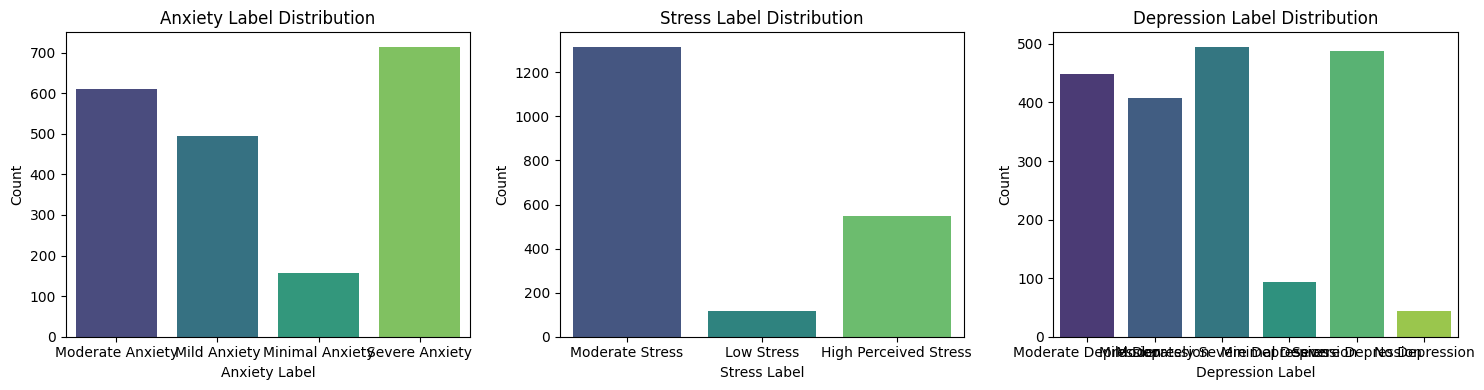

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns

labels = ['Anxiety Label', 'Stress Label', 'Depression Label']
plt.figure(figsize=(15, 4))
for i, label in enumerate(labels):
    plt.subplot(1, 3, i + 1)
    sns.countplot(data=df, x=label, palette="viridis")
    plt.title(f'{label} Distribution')
    plt.xlabel(label)
    plt.ylabel("Count")
plt.tight_layout()
plt.show()

C:\Users\GAUTAM RAJPUROHIT\AppData\Local\Temp\ipykernel_22820\3513746810.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feat_df, palette='crest')


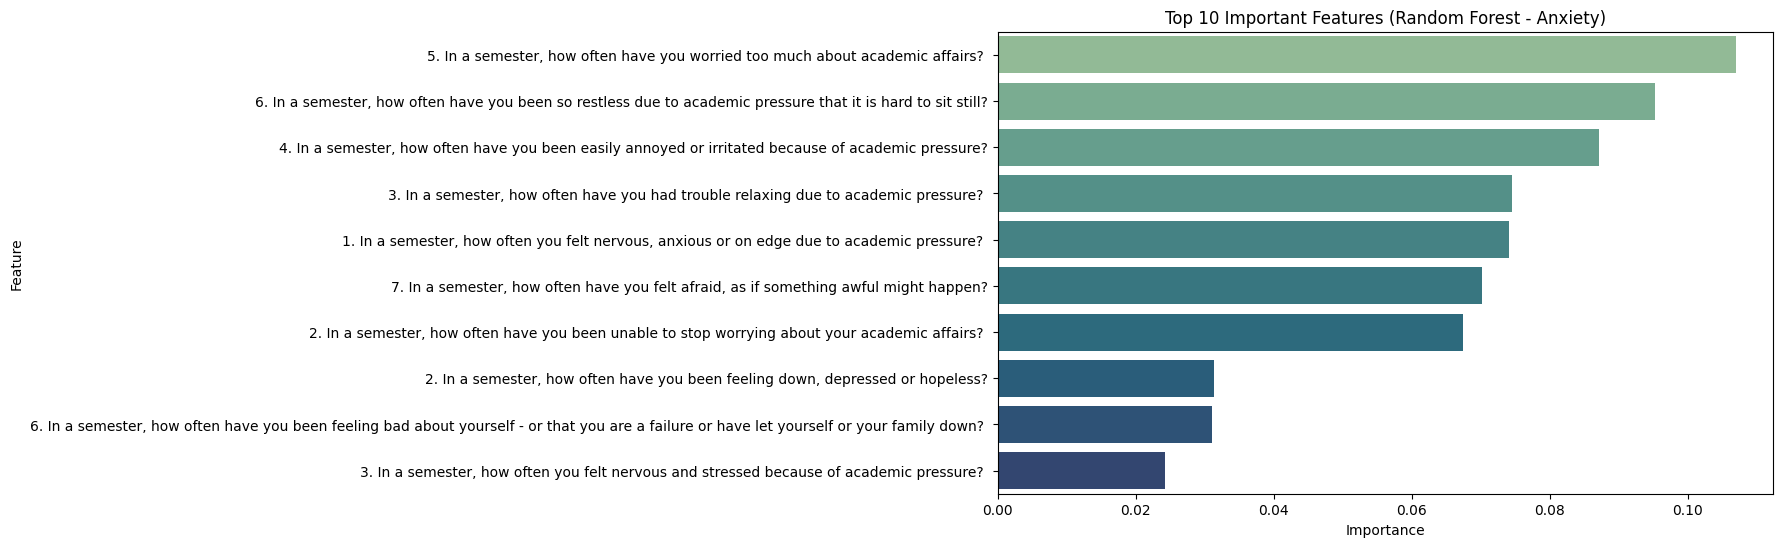

In [108]:
importances = anxiety_model.feature_importances_
feature_names = X.columns

# Create a DataFrame for plotting
feat_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feat_df = feat_df.sort_values(by='Importance', ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feat_df, palette='crest')
plt.title("Top 10 Important Features (Random Forest - Anxiety)")
plt.show()

C:\Users\GAUTAM RAJPUROHIT\AppData\Local\Temp\ipykernel_22820\3644713069.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=importance_df_rf_stress, x='Importance', y='Feature', palette='crest')
C:\Users\GAUTAM RAJPUROHIT\AppData\Local\Temp\ipykernel_22820\3644713069.py:20: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


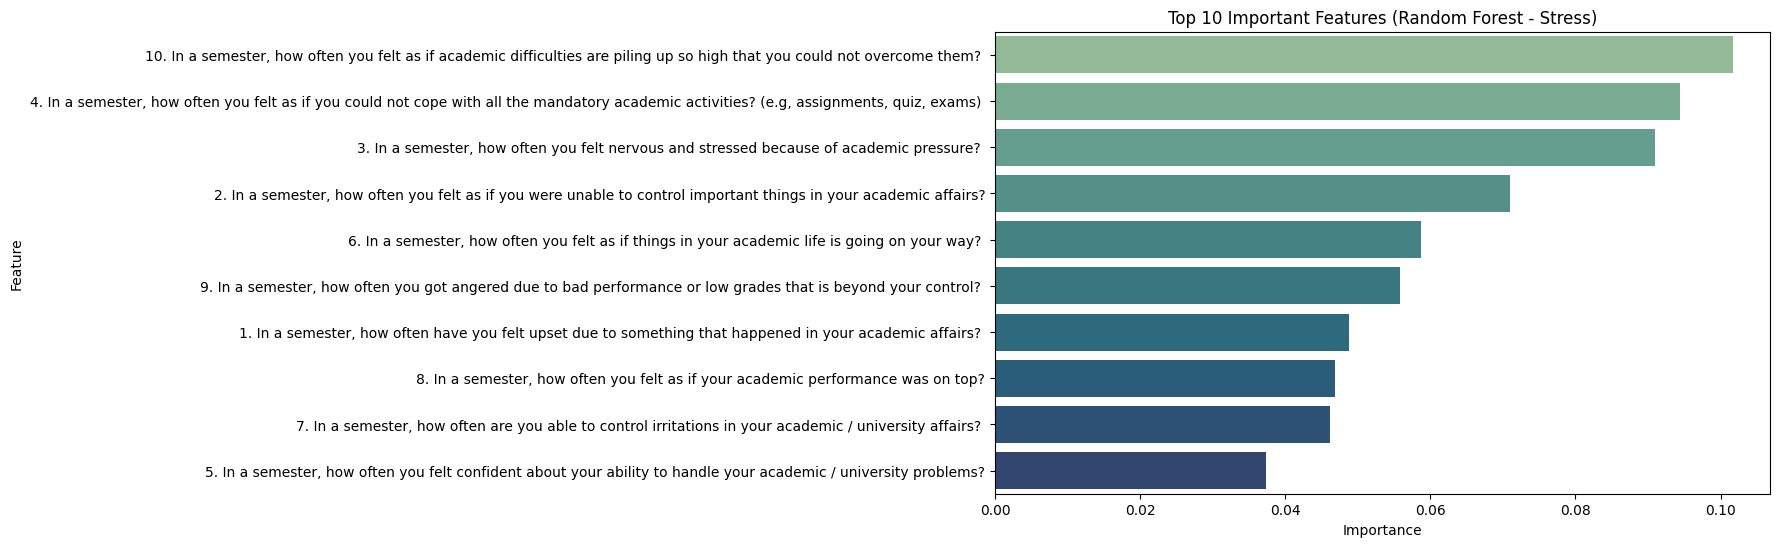

In [98]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Ensure that X contains the feature names used during training.
rf_feature_names = X.columns  

# Extract feature importances from the Random Forest model for Stress.
rf_importances_stress = stress_model.feature_importances_
importance_df_rf_stress = pd.DataFrame({
    'Feature': rf_feature_names,
    'Importance': rf_importances_stress
}).sort_values(by='Importance', ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(data=importance_df_rf_stress, x='Importance', y='Feature', palette='crest')
plt.title("Top 10 Important Features (Random Forest - Stress)")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

C:\Users\GAUTAM RAJPUROHIT\AppData\Local\Temp\ipykernel_22820\3349987740.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=importance_df_rf_depression, x='Importance', y='Feature', palette='crest')
C:\Users\GAUTAM RAJPUROHIT\AppData\Local\Temp\ipykernel_22820\3349987740.py:20: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


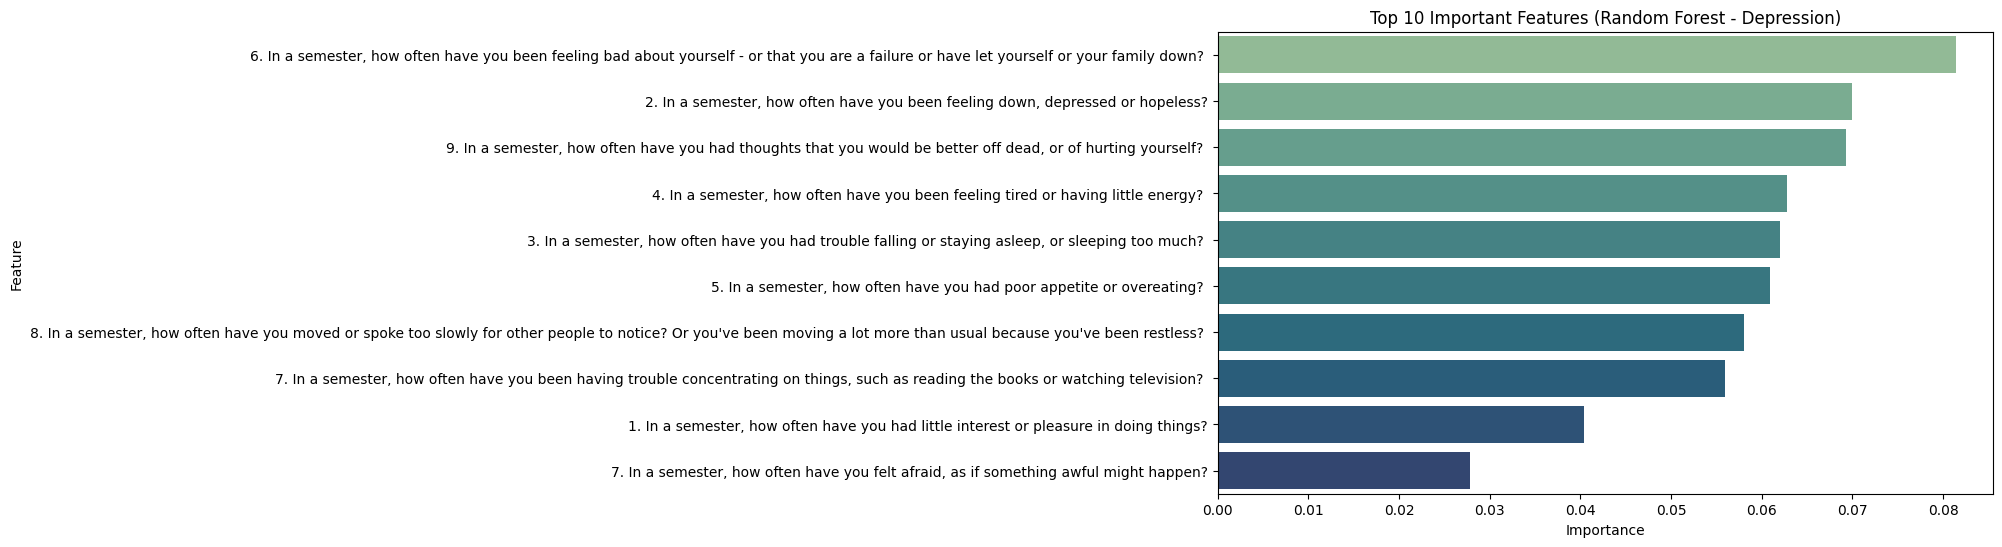

In [100]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Ensure that X contains the feature names used during training.
rf_feature_names = X.columns  

# Extract feature importances from the Random Forest model for Depression.
rf_importances_depression = depression_model.feature_importances_
importance_df_rf_depression = pd.DataFrame({
    'Feature': rf_feature_names,
    'Importance': rf_importances_depression
}).sort_values(by='Importance', ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(data=importance_df_rf_depression, x='Importance', y='Feature', palette='crest')
plt.title("Top 10 Important Features (Random Forest - Depression)")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

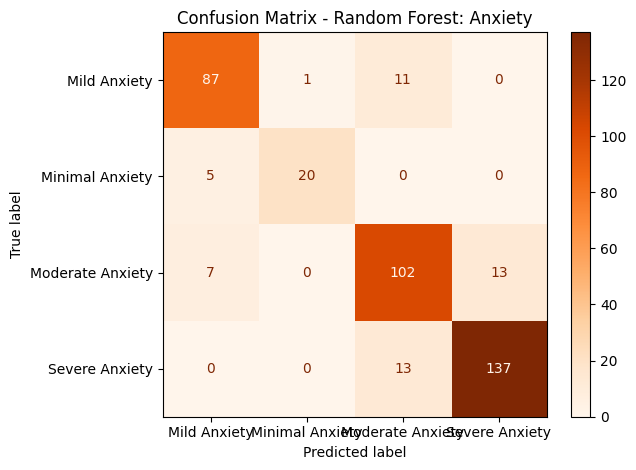

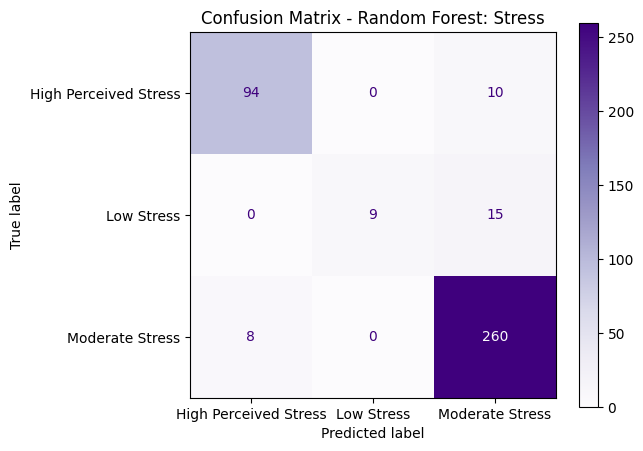

<module 'matplotlib.pyplot' from 'C:\\Users\\GAUTAM RAJPUROHIT\\anaconda3\\Lib\\site-packages\\matplotlib\\pyplot.py'>

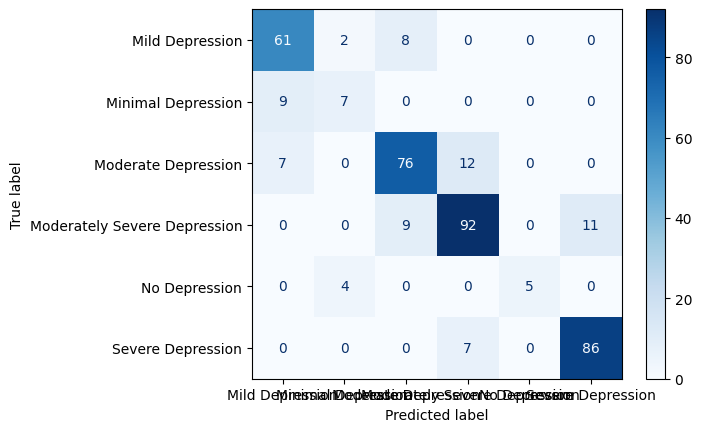

In [92]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Anxiety Confusion Matrix
cm_rf_anxiety = confusion_matrix(y_test_anxiety, anxiety_model.predict(X_test_anxiety))
disp_rf_anxiety = ConfusionMatrixDisplay(confusion_matrix=cm_rf_anxiety, 
                                          display_labels=anxiety_model.classes_)
disp_rf_anxiety.plot(cmap='Oranges')
plt.title("Confusion Matrix - Random Forest: Anxiety")
plt.tight_layout()
plt.show()

# Stress Confusion Matrix
cm_rf_stress = confusion_matrix(y_test_stress, stress_model.predict(X_test_stress))
disp_rf_stress = ConfusionMatrixDisplay(confusion_matrix=cm_rf_stress, 
                                         display_labels=stress_model.classes_)
disp_rf_stress.plot(cmap='Purples')
plt.title("Confusion Matrix - Random Forest: Stress")
plt.tight_layout()
plt.show()

# Depression Confusion Matrix
cm_rf_depression = confusion_matrix(y_test_depression, depression_model.predict(X_test_depression))
disp_rf_depression = ConfusionMatrixDisplay(confusion_matrix=cm_rf_depression, 
                                             display_labels=depression_model.classes_)
disp_rf_depression.plot(cmap='Blues')
plt

In [68]:
# Sample 500 rows to speed up pairplot
sample_df = df.sample(n=500, random_state=42)
sns.pairplot(sample_df, hue='Depression Label', palette='coolwarm', diag_kind='kde')
plt.suptitle('Pairplot Colored by Depression Label', y=1.02)
plt.show()

C:\Users\GAUTAM RAJPUROHIT\AppData\Local\Temp\ipykernel_22820\2391023821.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=label, y='6. Current CGPA', data=df, palette='Set2')
C:\Users\GAUTAM RAJPUROHIT\AppData\Local\Temp\ipykernel_22820\2391023821.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=label, y='6. Current CGPA', data=df, palette='Set2')
C:\Users\GAUTAM RAJPUROHIT\AppData\Local\Temp\ipykernel_22820\2391023821.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=label, y='6. Current CGPA', data=df, palette='Set2')


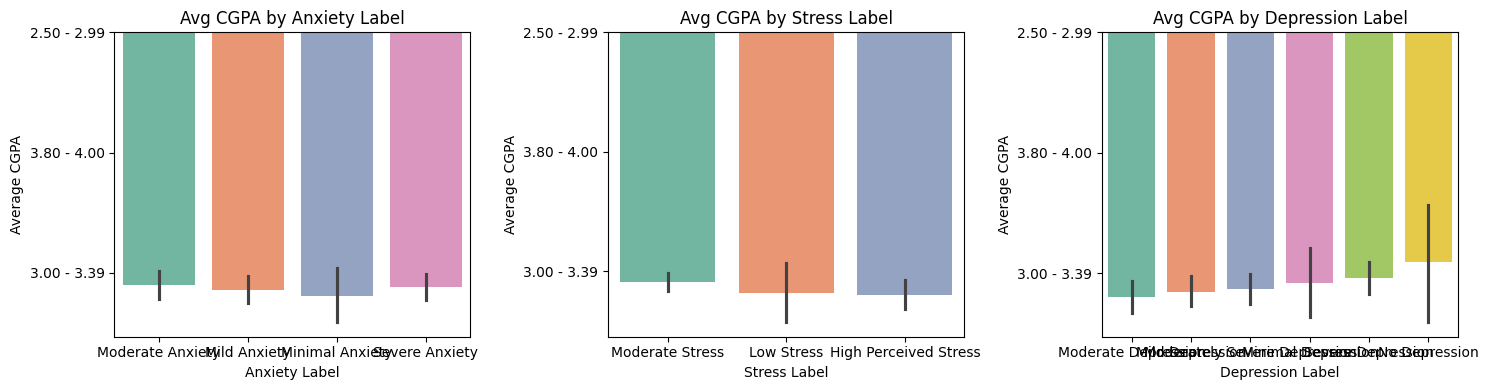

In [70]:
plt.figure(figsize=(15, 4))

for i, label in enumerate(['Anxiety Label', 'Stress Label', 'Depression Label']):
    plt.subplot(1, 3, i+1)
    sns.barplot(x=label, y='6. Current CGPA', data=df, palette='Set2')
    plt.title(f"Avg CGPA by {label}")
    plt.xlabel(label)
    plt.ylabel('Average CGPA')

plt.tight_layout()
plt.show()

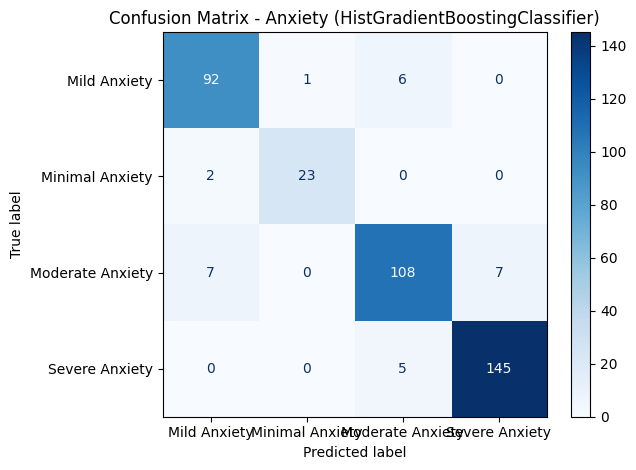

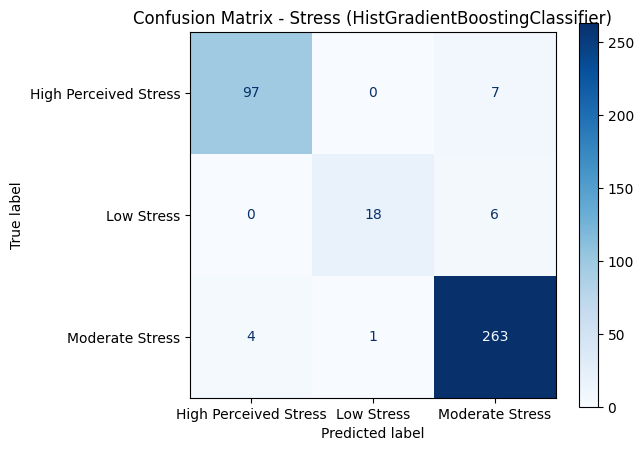

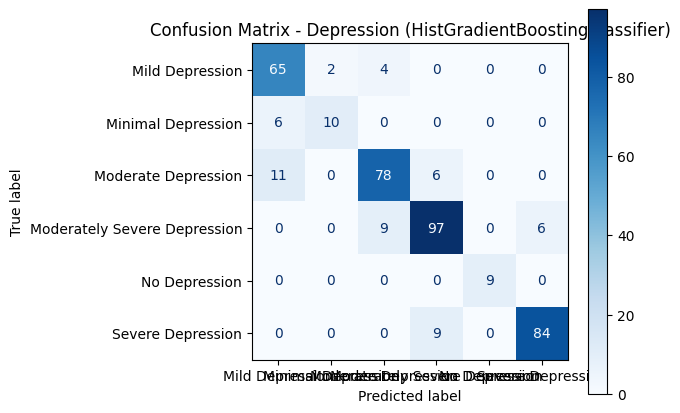

In [82]:
from sklearn.metrics import ConfusionMatrixDisplay

for i, label in enumerate(["Anxiety", "Stress", "Depression"]):
    ConfusionMatrixDisplay.from_estimator(model.estimators_[i], X_test, y_test.iloc[:, i],
                                          cmap='Blues')
    plt.title(f"Confusion Matrix - {label} (HistGradientBoostingClassifier)")
    plt.tight_layout()
    plt.show()

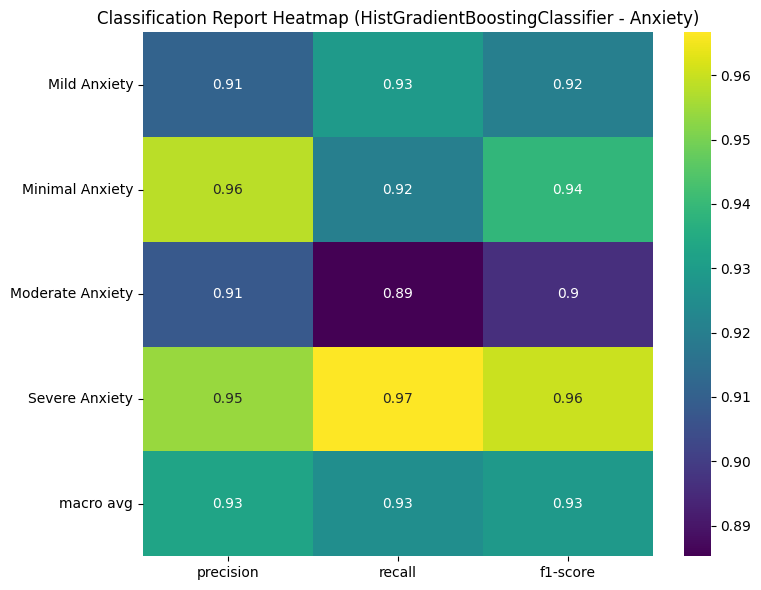

In [102]:
from sklearn.metrics import classification_report
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Generate the classification report dictionary for Anxiety using the first estimator
report_anxiety = classification_report(y_test['Anxiety Label'], model.estimators_[0].predict(X_test), output_dict=True)
df_report_anxiety = pd.DataFrame(report_anxiety).transpose()

# Optionally remove the 'accuracy' row for a cleaner heatmap (if desired)
df_report_anxiety = df_report_anxiety.drop('accuracy', errors='ignore')

plt.figure(figsize=(8, 6))
sns.heatmap(df_report_anxiety.iloc[:-1, :-1], annot=True, cmap='viridis')  # Excluding support column if desired.
plt.title("Classification Report Heatmap (HistGradientBoostingClassifier - Anxiety)")
plt.tight_layout()
plt.show()

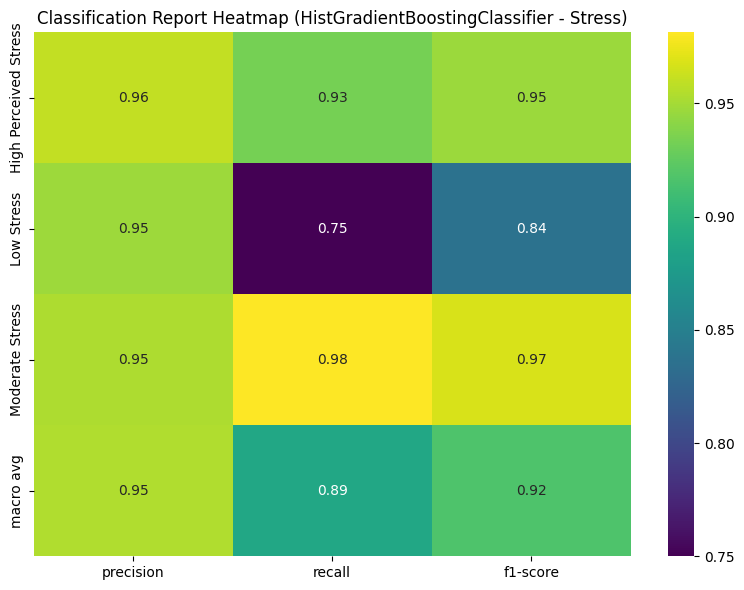

In [104]:
from sklearn.metrics import classification_report
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Generate the classification report dictionary for Stress using the second estimator
report_stress = classification_report(y_test['Stress Label'], model.estimators_[1].predict(X_test), output_dict=True)
df_report_stress = pd.DataFrame(report_stress).transpose()

# Optionally remove the 'accuracy' row for a cleaner heatmap
df_report_stress = df_report_stress.drop('accuracy', errors='ignore')

plt.figure(figsize=(8, 6))
sns.heatmap(df_report_stress.iloc[:-1, :-1], annot=True, cmap='viridis')
plt.title("Classification Report Heatmap (HistGradientBoostingClassifier - Stress)")
plt.tight_layout()
plt.show()

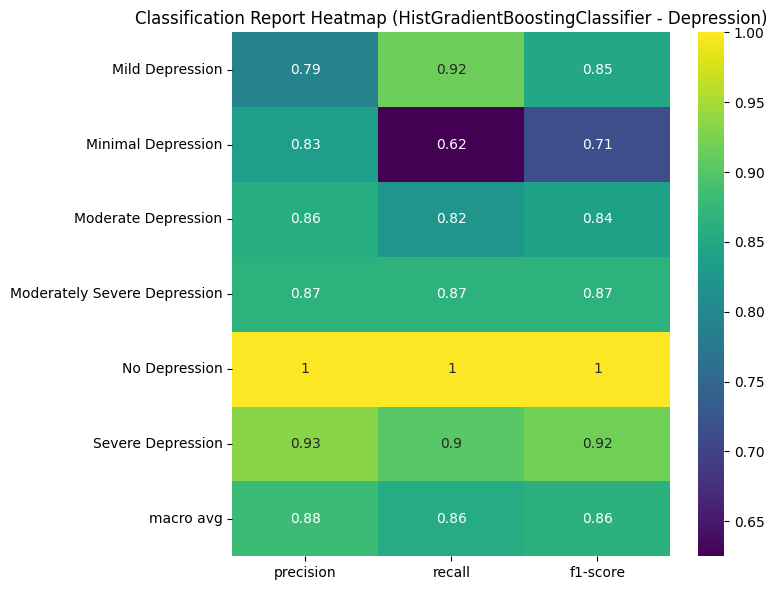

In [110]:
from sklearn.metrics import classification_report
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Generate the classification report dictionary for Depression using the third estimator
report_depression = classification_report(y_test['Depression Label'], model.estimators_[2].predict(X_test), output_dict=True)
df_report_depression = pd.DataFrame(report_depression).transpose()

# Optionally remove the 'accuracy' row for a cleaner heatmap
df_report_depression = df_report_depression.drop('accuracy', errors='ignore')

plt.figure(figsize=(8, 6))
sns.heatmap(df_report_depression.iloc[:-1, :-1], annot=True, cmap='viridis')
plt.title("Classification Report Heatmap (HistGradientBoostingClassifier - Depression)")
plt.tight_layout()
plt.show()